In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"/content/Doctor_Who_dataset.csv")
data.head()

,Unnamed: 0,Season,Episode Number,Episode Name,Air Date,IMDb Rating,Votes
0,0,S1,E1,Rose,"Fri, Mar 17, 2006",7.5,(11K)
1,1,S1,E2,The End of the World,"Fri, Mar 17, 2006",7.5,(9.9K)
2,2,S1,E3,The Unquiet Dead,"Fri, Mar 24, 2006",7.4,(9.3K)
3,3,S1,E4,Aliens of London,"Fri, Mar 31, 2006",6.9,(9K)
4,4,S1,E5,World War Three,"Fri, Apr 7, 2006",6.9,(8.7K)


In [6]:
data=data[["Season","Episode Number","Episode Name","Air Date","IMDb Rating", "Votes"]]
data.head()

,Season,Episode Number,Episode Name,Air Date,IMDb Rating,Votes
0,S1,E1,Rose,"Fri, Mar 17, 2006",7.5,(11K)
1,S1,E2,The End of the World,"Fri, Mar 17, 2006",7.5,(9.9K)
2,S1,E3,The Unquiet Dead,"Fri, Mar 24, 2006",7.4,(9.3K)
3,S1,E4,Aliens of London,"Fri, Mar 31, 2006",6.9,(9K)
4,S1,E5,World War Three,"Fri, Apr 7, 2006",6.9,(8.7K)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          164 non-null    object 
 1   Episode Number  164 non-null    object 
 2   Episode Name    164 non-null    object 
 3   Air Date        164 non-null    object 
 4   IMDb Rating     164 non-null    float64
 5   Votes           164 non-null    object 
dtypes: float64(1), object(5)
memory usage: 7.8+ KB


In [13]:
data[["Day", "Date"]] = data["Air Date"].str.split(",", n=1, expand=True)

data["Date"] = data["Date"].str.strip()


In [19]:
data=data.drop(["Air Date"],axis=1)

In [20]:
data.head()

,Season,Episode Number,Episode Name,IMDb Rating,Votes,Day,Date
0,S1,E1,Rose,7.5,(11K),Fri,"Mar 17, 2006"
1,S1,E2,The End of the World,7.5,(9.9K),Fri,"Mar 17, 2006"
2,S1,E3,The Unquiet Dead,7.4,(9.3K),Fri,"Mar 24, 2006"
3,S1,E4,Aliens of London,6.9,(9K),Fri,"Mar 31, 2006"
4,S1,E5,World War Three,6.9,(8.7K),Fri,"Apr 7, 2006"


In [24]:
data["Date"]=pd.to_datetime(data["Date"],format="%b %d, %Y")
data

,Season,Episode Number,Episode Name,IMDb Rating,Votes,Day,Date
0,S1,E1,Rose,7.5,(11K),Fri,2006-03-17
1,S1,E2,The End of the World,7.5,(9.9K),Fri,2006-03-17
2,S1,E3,The Unquiet Dead,7.4,(9.3K),Fri,2006-03-24
3,S1,E4,Aliens of London,6.9,(9K),Fri,2006-03-31
4,S1,E5,World War Three,6.9,(8.7K),Fri,2006-04-07
...,...,...,...,...,...,...,...
159,S13,E2,Flux: Chapter Two - War of the Sontarans,7.0,(4.2K),Sun,2021-11-07
160,S13,E3,"Flux: Chapter Three - Once, Upon Time",5.9,(3.8K),Sun,2021-11-14
161,S13,E4,Flux: Chapter Four - Village of the Angels,7.7,(4.2K),Sun,2021-11-21
162,S13,E5,Flux: Chapter Five - Survivors of the Flux,6.1,(3.5K),Sun,2021-11-28


## Top-Rated Episodes by Season

In [26]:
top_rated = data.loc[data.groupby("Season")["IMDb Rating"].idxmax()]
print(top_rated[["Season", "Episode Name", "IMDb Rating"]])
top3perseason=data.sort_values(["Season","IMDb Rating"],ascending=[True,False]).groupby("Season").head(3)
top3perseason

    Season                                Episode Name  IMDb Rating
8       S1                             The Empty Child          9.0
135    S10                       World Enough and Time          9.1
137    S11                           Twice Upon a Time          8.3
152    S12                      Fugitive of the Judoon          7.5
161    S13  Flux: Chapter Four - Village of the Angels          7.7
17      S2                   The Girl in the Fireplace          9.2
37      S3                                       Blink          9.8
50      S4                          Forest of the Dead          9.4
64      S5                      Vincent and the Doctor          9.3
75      S6                      A Good Man Goes to War          9.0
87      S7                   The Angels Take Manhattan          8.9
101     S8                                      Listen          8.7
121     S9                                 Heaven Sent          9.6


,Season,Episode Number,Episode Name,IMDb Rating,Votes,Day,Date
8,S1,E9,The Empty Child,9.0,(11K),Fri,2006-05-05
9,S1,E10,The Doctor Dances,9.0,(10K),Fri,2006-05-12
12,S1,E13,The Parting of the Ways,9.0,(9.8K),Fri,2006-06-09
135,S10,E11,World Enough and Time,9.1,(6.4K),Sat,2017-06-24
136,S10,E12,The Doctor Falls,9.0,(6.4K),Sat,2017-07-01
130,S10,E6,Extremis,8.3,(5.5K),Sat,2017-05-20
137,S11,E0,Twice Upon a Time,8.3,(8.2K),Mon,2017-12-25
140,S11,E3,Rosa,7.1,(11K),Sun,2018-10-21
138,S11,E1,The Woman Who Fell to Earth,6.9,(12K),Sun,2018-10-07
152,S12,E5,Fugitive of the Judoon,7.5,(6.4K),Sun,2020-01-26


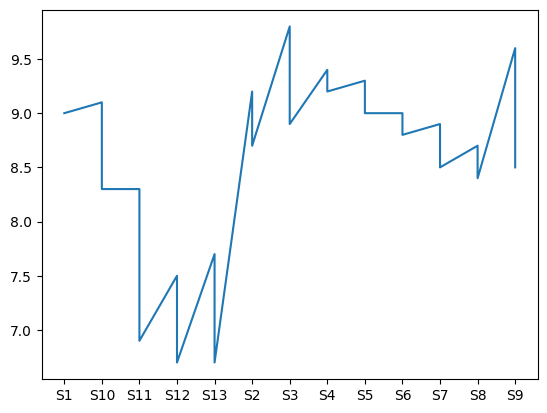

In [31]:
top3perseason
plt.plot(top3perseason["Season"],top3perseason["IMDb Rating"])

##Episode Ratings Over Time

In [55]:
episoderatings = data.groupby("Season", as_index=False)["IMDb Rating"].mean()
episoderatings = episoderatings.sort_values("Season", ascending=True)


In [54]:

data["Season"] = data["Season"].str.extract(r'(\d+)').astype(int)


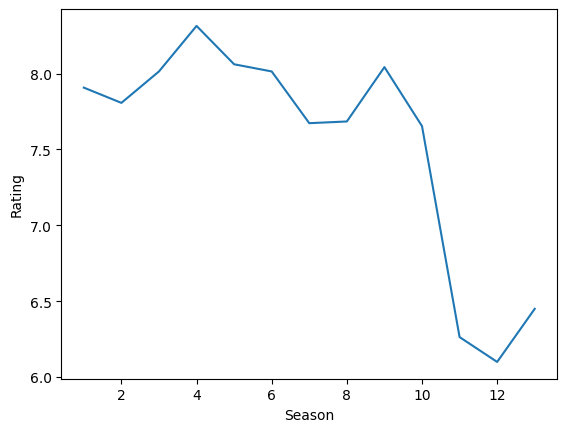

In [56]:
plt.plot(episoderatings["Season"],episoderatings["IMDb Rating"])
plt.xlabel("Season")
plt.ylabel("Rating")
plt.show()

- David Tennant had the most popularity and the show was at its peak during the 4th Season.
- Peter Capaldi's Twelfth Doctor was the last doctor who was critically acclaimed, after which there has been a steady downfall.


##Most Popular Episodes

In [59]:
top3overall=data.sort_values(["IMDb Rating"],ascending=False).head(10)
top3overall

,Season,Episode Number,Episode Name,IMDb Rating,Votes,Day,Date
37,3,E10,Blink,9.8,(25K),Fri,2007-09-14
121,9,E11,Heaven Sent,9.6,(14K),Sat,2015-11-28
50,4,E9,Forest of the Dead,9.4,(12K),Fri,2008-06-27
64,5,E10,Vincent and the Doctor,9.3,(14K),Sat,2010-06-26
49,4,E8,Silence in the Library,9.3,(12K),Fri,2008-06-20
17,2,E4,The Girl in the Fireplace,9.2,(14K),Fri,2006-10-20
54,4,E13,Journey's End,9.2,(10K),Fri,2008-08-01
26,2,E13,Doomsday,9.2,(11K),Fri,2006-12-22
36,3,E9,The Family of Blood,9.2,(11K),Fri,2007-09-07
67,5,E13,The Big Bang,9.1,(9K),Sat,2010-07-24


- The early seasons were much loved by the fans than the newer seasons.


In [64]:
data.head(100)

,Season,Episode Number,Episode Name,IMDb Rating,Votes,Day,Date
0,1,E1,Rose,7.5,(11K),Fri,2006-03-17
1,1,E2,The End of the World,7.5,(9.9K),Fri,2006-03-17
2,1,E3,The Unquiet Dead,7.4,(9.3K),Fri,2006-03-24
3,1,E4,Aliens of London,6.9,(9K),Fri,2006-03-31
4,1,E5,World War Three,6.9,(8.7K),Fri,2006-04-07
...,...,...,...,...,...,...,...
95,7,E13,Nightmare in Silver,7.2,(6.3K),Sat,2013-05-11
96,7,E14,The Name of the Doctor,8.9,(9.1K),Sat,2013-05-18
97,8,E0,The Time of the Doctor,8.4,(8.4K),Wed,2013-12-25
98,8,E1,Deep Breath,7.8,(9.2K),Sat,2014-08-23


In [70]:
print(data["Episode Name"].unique())


['Rose' 'The End of the World' 'The Unquiet Dead' 'Aliens of London'
 'World War Three' 'Dalek' 'The Long Game' "Father's Day"
 'The Empty Child' 'The Doctor Dances' 'Boom Town' 'Bad Wolf'
 'The Parting of the Ways' 'The Christmas Invasion' 'New Earth'
 'Tooth and Claw' 'School Reunion' 'The Girl in the Fireplace'
 'Rise of the Cybermen' 'The Age of Steel' "The Idiot's Lantern"
 'The Impossible Planet' 'The' 'Love &' 'Fear Her' 'Army of Ghosts'
 'Doomsday' 'The Runaway Bride' 'Smith and Jones' 'The Shakespeare Code'
 'Gridlock' 'Daleks in Manhattan' 'Evolution of the Daleks'
 'The Lazarus Experiment' '42' 'Human Nature' 'The Family of Blood'
 'Blink' 'Utopia' 'The Sound of Drums' 'Last of the Time Lords'
 'Voyage of the Damned' 'Partners in Crime' 'The Fires of Pompeii'
 'Planet of the Ood' 'The Sontaran Stratagem' 'The Poison Sky'
 "The Doctor's Daughter" 'The Unicorn and the Wasp'
 'Silence in the Library' 'Forest of the Dead' 'Midnight' 'Turn Left'
 'The Stolen Earth' "Journey's End

##Best and Worst Regenerations

In [73]:
regenerationepisodes=["The Parting of the Ways",
    "Journey's End", "The Time of the Doctor", "Twice Upon a Time",]
regeneration_episodes_df=data[data["Episode Name"].isin(regenerationepisodes)]

In [74]:
best_regeneration = regeneration_episodes_df.loc[regeneration_episodes_df["IMDb Rating"].idxmax()]
worst_regeneration = regeneration_episodes_df.loc[regeneration_episodes_df["IMDb Rating"].idxmin()]

print("Best Regeneration Episode:\n", best_regeneration)
print("\nWorst Regeneration Episode:\n", worst_regeneration)


Best Regeneration Episode:
 Season                              4
Episode Number                   E13 
Episode Name            Journey's End
IMDb Rating                       9.2
Votes                           (10K)
Day                               Fri
Date              2008-08-01 00:00:00
Name: 54, dtype: object

Worst Regeneration Episode:
 Season                             11
Episode Number                    E0 
Episode Name        Twice Upon a Time
IMDb Rating                       8.3
Votes                          (8.2K)
Day                               Mon
Date              2017-12-25 00:00:00
Name: 137, dtype: object


In [76]:
avg_regeneration_rating = regeneration_episodes_df["IMDb Rating"].mean()
avg_other_rating = data[~data["Episode Name"].isin(regenerationepisodes)]["IMDb Rating"].mean()

print(f"Average Rating - Regeneration Episodes: {avg_regeneration_rating:.2f}")
print(f"Average Rating - Other Episodes: {avg_other_rating:.2f}")


Average Rating - Regeneration Episodes: 8.73
Average Rating - Other Episodes: 7.62
